Attention:

We have 2 approch solved here

1. cell wise approach
2. functional approach

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# For binary classification, let's filter only two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.9743589743589743
Precision: 1.0
Recall: 0.9473684210526315
ROC AUC: 1.0


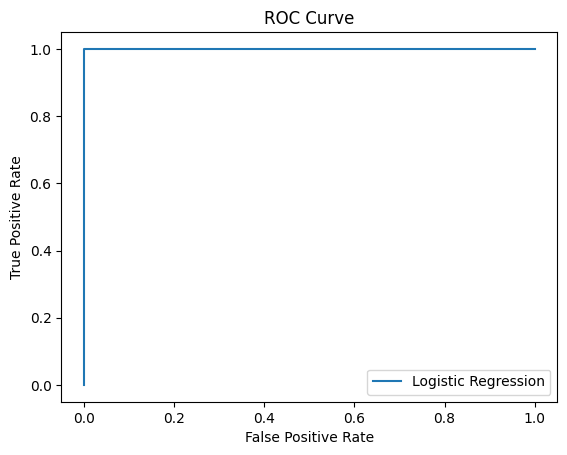

In [11]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Train the k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Print correct and wrong predictions
print("Correct Predictions:", np.sum(y_pred_knn == y_test))
print("Wrong Predictions:", np.sum(y_pred_knn != y_test))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Correct Predictions: 38
Wrong Predictions: 1
Accuracy: 0.9743589743589743


Accuracy: 0.9743589743589743


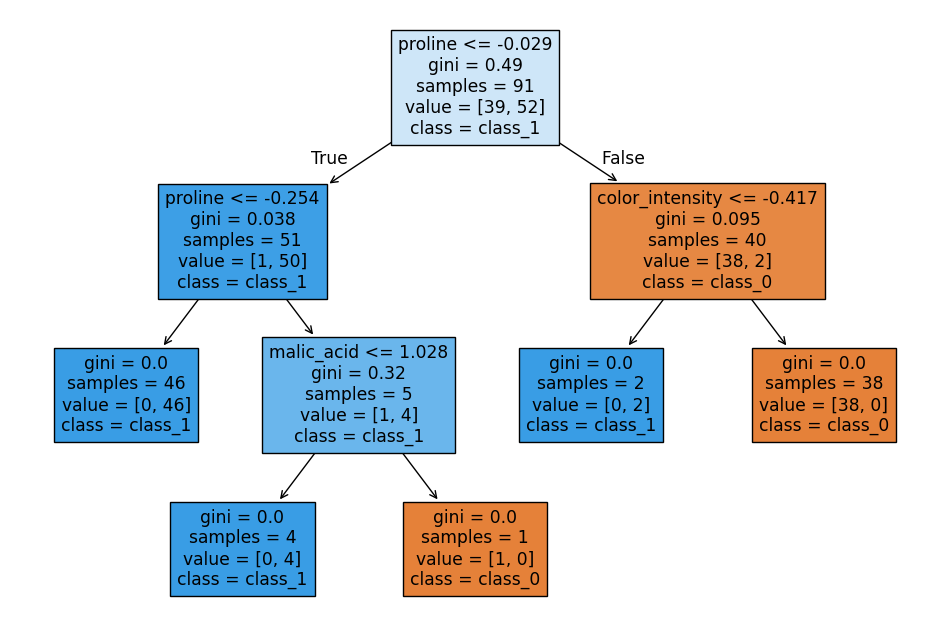

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train the Decision Tree model
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=data.feature_names, class_names=data.target_names[:2], filled=True)
plt.show()


In [14]:
from sklearn.svm import SVC

# Train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Accuracy: 1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Accuracy: 1.0


In [16]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Accuracy: 1.0


If you want functional approach you can use below code

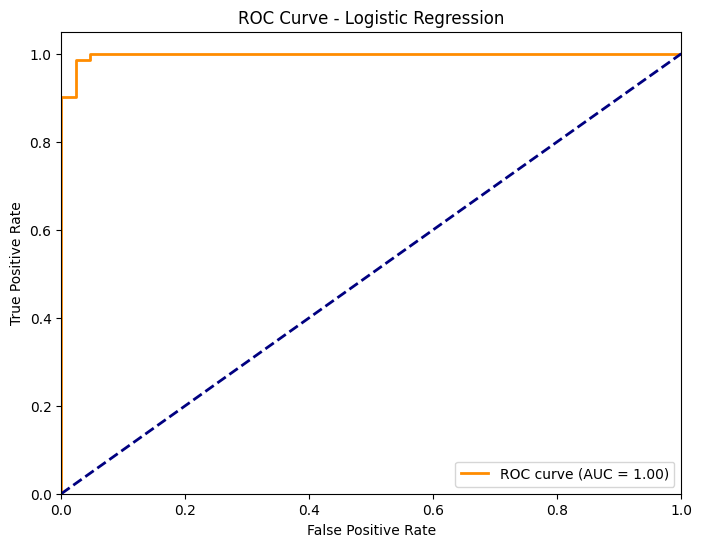

Logistic Regression Metrics:
Accuracy: 0.974
Precision: 0.972
Recall: 0.986

KNN Results:
Accuracy: 0.947
Number of correct predictions: 108
Number of wrong predictions: 6


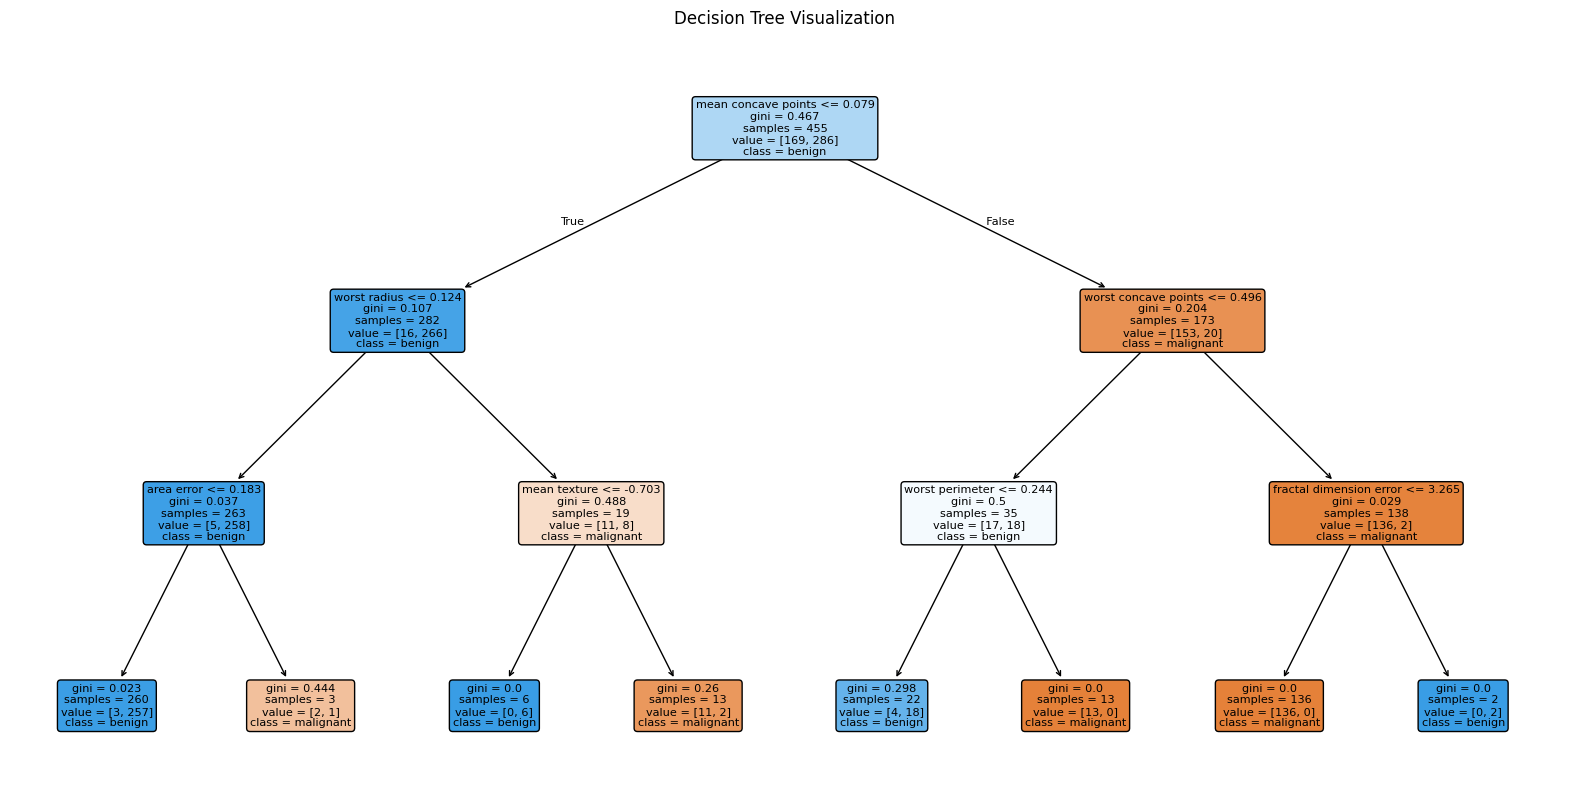


Decision Tree Accuracy: 0.947

SVM Accuracy: 0.982

Random Forest vs Decision Tree:
Single Decision Tree Accuracy: 0.947
Random Forest (10 trees) Accuracy: 0.956
Random Forest (50 trees) Accuracy: 0.965
Random Forest (100 trees) Accuracy: 0.965


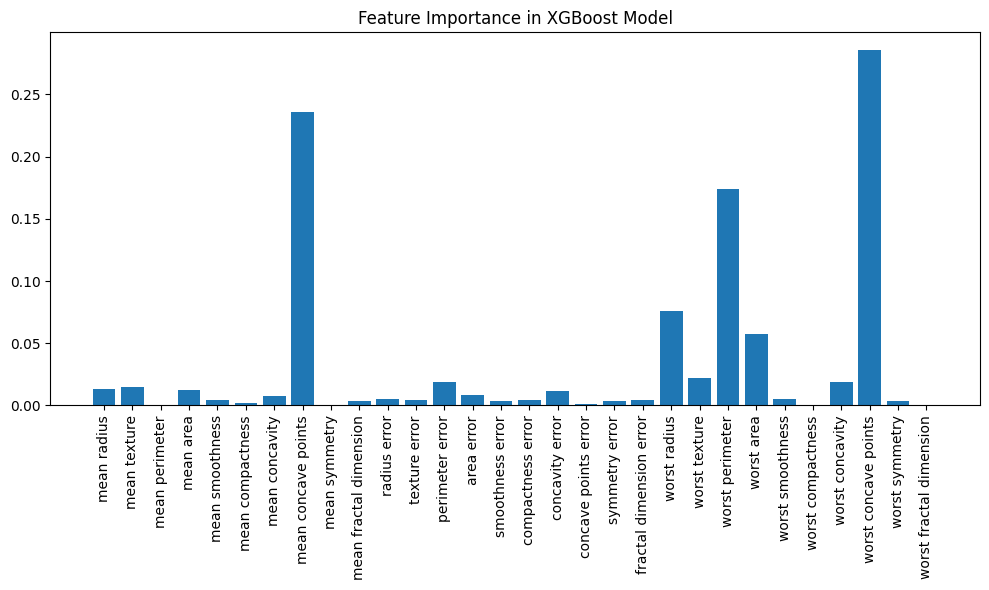


XGBoost Accuracy: 0.956

Top 5 Most Important Features:
                 feature  importance
27  worst concave points    0.285641
7    mean concave points    0.235738
22       worst perimeter    0.174253
20          worst radius    0.075987
23            worst area    0.057031


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a. Logistic Regression
def train_logistic_regression():
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lr_model.predict(X_test_scaled)
    y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Logistic Regression Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")

# b. K-Nearest Neighbors
def train_knn():
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test_scaled)

    # Get correct and wrong predictions
    correct_pred = X_test[y_pred == y_test]
    wrong_pred = X_test[y_pred != y_test]

    print("\nKNN Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Number of correct predictions: {len(correct_pred)}")
    print(f"Number of wrong predictions: {len(wrong_pred)}")

# c. Decision Tree
def train_decision_tree():
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt_model.fit(X_train_scaled, y_train)

    # Visualize the tree
    plt.figure(figsize=(20,10))
    plot_tree(dt_model, feature_names=data.feature_names,
              class_names=['malignant', 'benign'],
              filled=True, rounded=True)
    plt.title("Decision Tree Visualization")
    plt.show()

    # Calculate accuracy
    y_pred = dt_model.predict(X_test_scaled)
    print(f"\nDecision Tree Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# d. Support Vector Machine
def train_svm():
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    y_pred = svm_model.predict(X_test_scaled)
    print(f"\nSVM Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# e. Random Forest
def train_random_forest():
    # Train single decision tree for comparison
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_scaled, y_train)
    dt_pred = dt_model.predict(X_test_scaled)
    dt_accuracy = accuracy_score(y_test, dt_pred)

    # Train random forests with different numbers of trees
    n_trees = [10, 50, 100]
    rf_accuracies = []

    for n in n_trees:
        rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
        rf_model.fit(X_train_scaled, y_train)
        rf_pred = rf_model.predict(X_test_scaled)
        rf_accuracies.append(accuracy_score(y_test, rf_pred))

    print("\nRandom Forest vs Decision Tree:")
    print(f"Single Decision Tree Accuracy: {dt_accuracy:.3f}")
    for n, acc in zip(n_trees, rf_accuracies):
        print(f"Random Forest ({n} trees) Accuracy: {acc:.3f}")

# f. XGBoost
def train_xgboost():
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_scaled, y_train)

    y_pred = xgb_model.predict(X_test_scaled)

    # Get feature importance
    importance = xgb_model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': data.feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance)
    plt.xticks(range(len(importance)), data.feature_names, rotation=90)
    plt.title('Feature Importance in XGBoost Model')
    plt.tight_layout()
    plt.show()

    print(f"\nXGBoost Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())

# Run all models
train_logistic_regression()
train_knn()
train_decision_tree()
train_svm()
train_random_forest()
train_xgboost()